In [186]:
import numpy as np
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

def get_transformation_dict_from_vesper_output(vesper_output_filename):
    with open(vesper_output_filename) as f:
        text = f.read()
    text_chunks = text.split('#')[-11:]
    model0_info = text_chunks[0][2:]
    #print(model0_info)

    locs = [i for i in range(len(model0_info)) if model0_info[i] == '=']
    #print(locs)
    
    model0_dict = {}
    model0_keys = []
    model0_values = []
    
    for idx,loc in enumerate(locs):
        if idx == 0:
            model0_keys.append(model0_info[:loc])
            value_string = model0_info[loc:locs[idx+1]].strip('=')
            value_string2 = value_string.replace('\n', ' ').split(' ')[:-1]
            model0_values.append(' '.join(value_string2).replace(' ', ','))
        elif idx == len(locs)-1:
            key_string = model0_info[locs[idx-1]:loc].strip('=')
            key_string2 = key_string.replace('\n', ' ').split(' ')
            model0_keys.append(key_string2.pop(-1))

            value_string = model0_info[loc:].strip('=')
            value_string2 = value_string.replace('\n', ' ').strip(' ')
            model0_values.append(value_string2)
        else:
            key_string = model0_info[locs[idx-1]:loc].strip('=')
            key_string2 = key_string.replace('\n', ' ').split(' ')
            model0_keys.append(key_string2.pop(-1))

            value_string = model0_info[loc:locs[idx+1]].strip('=')
            value_string2 = value_string.replace('\n', ' ').split(' ')[:-1]
            value_string3 = ' '.join(value_string2).replace(' ', ',')
            if value_string3[0] == ',':
                model0_values.append(value_string3[1:])
            else:
                model0_values.append(value_string3)

    for idx,key in enumerate(model0_keys):
        model0_dict[key] = model0_values[idx]
    
    return model0_dict

In [187]:
files = os.listdir('test2_outputs/')
print(files)

all_models_dict = {}

for file in files:
    file_dict = get_transformation_dict_from_vesper_output(f'test2_outputs/{file}')
    all_models_dict[file] = file_dict

['D2_SAMIV_good_axis_flipped_SAMIV', 'D10_SAMIV_bad_FMN', 'D4_FMN_good_axis_flipped_SAMIV', 'D10_SAMIV_bad_axis_flipped_SAMIV', 'D4_FMN_good_axis_flipped_FMN', 'D3_FMN_bad_SAMIV', 'D2_SAMIV_good_axis_flipped_FMN', 'D10_SAMIV_bad_axis_flipped_FMN', 'D2_SAMIV_good_SAMIV', 'D2_SAMIV_good_FMN', 'D4_FMN_good_SAMIV', 'D3_FMN_bad_axis_flipped_SAMIV', 'D10_SAMIV_bad_SAMIV', 'D3_FMN_bad_axis_flipped_FMN', 'D3_FMN_bad_FMN', 'D4_FMN_good_FMN']


In [189]:
with open('data.json', 'w') as fp:
    json.dump(all_models_dict, fp)

In [152]:
all_models_df = pd.DataFrame(all_models_dict).T
all_models_df = all_models_df.rename_axis('map').reset_index()
#all_models_df.rename(columns={'index':'map'}, inplace=True)

In [153]:
all_models_df.info()
all_models_df[['CC']] = all_models_df[['CC']].apply(pd.to_numeric)
all_models_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   map      16 non-null     object
 1   R        16 non-null     object
 2   MTX      16 non-null     object
 3   T        16 non-null     object
 4   sco      16 non-null     object
 5   zsco     16 non-null     object
 6   Overlap  16 non-null     object
 7   CC       16 non-null     object
 8   PCC      16 non-null     object
 9   Score    16 non-null     object
 10  Std      16 non-null     object
 11  Ave      16 non-null     object
dtypes: object(12)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   map      16 non-null     object 
 1   R        16 non-null     object 
 2   MTX      16 non-null     object 
 3   T        16 non-null     object 
 4   sc

In [156]:
all_models_df

,map,R,MTX,T,sco,zsco,Overlap,CC,PCC,Score,Std,Ave
0,D2_SAMIV_good_axis_flipped_SAMIV,"{0.0,180.0,5.0}","{-0.996194700,-0.087155725,0.000000651,-0.0871...","{100.168,-78.177,93.000}",36.272,8.262909,"0.2744,59/215",0.529817,0.330780,36.3,2.586104,14.903110
1,D10_SAMIV_bad_FMN,"{55.0,90.0,355.0}","{0.000000326,0.866025948,0.499999057,-0.000000...","{-124.478,31.478,86.000}",57.556,4.293591,"0.3875,105/271",0.691677,0.337216,57.6,5.231401,35.094129
2,D4_FMN_good_axis_flipped_SAMIV,"{270.0,30.0,5.0}","{0.862729971,-0.498097170,-0.087156213,0.07547...","{-23.863,-95.416,117.478}",25.982,5.310086,"0.2245,44/196",0.429244,0.152623,26.0,2.246968,14.050573
3,D10_SAMIV_bad_axis_flipped_SAMIV,"{265.0,355.0,175.0}","{-0.992403709,-0.078898697,-0.094392124,0.0868...","{107.250,69.705,85.318}",27.676,4.885675,"0.2212,50/226",0.477528,0.226487,27.7,2.423379,15.836275
4,D4_FMN_good_axis_flipped_FMN,"{295.0,85.0,5.0}","{0.086824395,-0.936257304,0.340417076,0.007596...","{43.775,-117.894,96.298}",77.930,7.413639,"0.5450,115/211",0.766769,0.481432,77.9,6.306497,31.175956
5,D3_FMN_bad_SAMIV,"{5.0,185.0,120.0}","{0.498097002,-0.858932105,0.118890769,-0.86273...","{20.807,127.316,99.318}",32.420,6.741666,"0.2066,56/271",0.484511,0.161729,32.4,2.425212,16.070446
6,D2_SAMIV_good_axis_flipped_FMN,"{185.0,65.0,120.0}","{-0.211309078,0.902224810,0.375950616,0.365998...","{-98.751,2.562,124.317}",55.484,5.059505,"0.3984,102/256",0.643860,0.272896,55.5,4.973929,30.318038
7,D10_SAMIV_bad_axis_flipped_FMN,"{295.0,85.0,30.0}","{0.075479358,-0.993207865,-0.088549442,0.04357...","{93.540,-82.004,89.298}",61.162,4.841515,"0.3843,103/268",0.678871,0.316761,61.2,5.264523,35.673953
8,D2_SAMIV_good_SAMIV,"{0.0,0.0,0.0}","{1.000000000,0.000000000,0.000000000,0.0000000...","{-86.000,-86.000,-86.000}",74.914,18.277492,"0.4127,78/189",0.709367,0.540588,74.9,3.288705,14.804521
9,D2_SAMIV_good_FMN,"{60.0,180.0,25.0}","{-0.906307825,-0.211308656,0.365998330,-0.4226...","{71.639,71.874,124.478}",53.681,4.589979,"0.3523,93/264",0.592090,0.275293,53.7,5.014935,30.662442


In [166]:
## let's add some columns to this dataframe 
## whether I identified it by eye as fmn or samiv
## whether I classified it as "good" or "bad"
## axis flipped or not
## what original map it was classified into 


maps_list = all_models_df['map'].to_list()
identifications = []
quality = []
axis_flipped = []
original_map = []
#print(maps_list)
for item in maps_list:
    item_split = item.split('_')
    #print(item_split)
    #print(len(item_split))
    identifications.append(item_split[1])
    quality.append(item_split[2])
    original_map.append(item_split[-1])
    if len(item_split) == 4:
        axis_flipped.append('No')
    else:
        axis_flipped.append('Yes')

all_models_df['identified_as'] = identifications
all_models_df['quality'] = quality
all_models_df['axis_flipped'] = axis_flipped
all_models_df['original_map'] = original_map

In [167]:
all_models_df

,map,R,MTX,T,sco,zsco,Overlap,CC,PCC,Score,Std,Ave,identified_as,quality,axis_flipped,original_map
0,D2_SAMIV_good_axis_flipped_SAMIV,"{0.0,180.0,5.0}","{-0.996194700,-0.087155725,0.000000651,-0.0871...","{100.168,-78.177,93.000}",36.272,8.262909,"0.2744,59/215",0.529817,0.330780,36.3,2.586104,14.903110,SAMIV,good,Yes,SAMIV
1,D10_SAMIV_bad_FMN,"{55.0,90.0,355.0}","{0.000000326,0.866025948,0.499999057,-0.000000...","{-124.478,31.478,86.000}",57.556,4.293591,"0.3875,105/271",0.691677,0.337216,57.6,5.231401,35.094129,SAMIV,bad,No,FMN
2,D4_FMN_good_axis_flipped_SAMIV,"{270.0,30.0,5.0}","{0.862729971,-0.498097170,-0.087156213,0.07547...","{-23.863,-95.416,117.478}",25.982,5.310086,"0.2245,44/196",0.429244,0.152623,26.0,2.246968,14.050573,FMN,good,Yes,SAMIV
3,D10_SAMIV_bad_axis_flipped_SAMIV,"{265.0,355.0,175.0}","{-0.992403709,-0.078898697,-0.094392124,0.0868...","{107.250,69.705,85.318}",27.676,4.885675,"0.2212,50/226",0.477528,0.226487,27.7,2.423379,15.836275,SAMIV,bad,Yes,SAMIV
4,D4_FMN_good_axis_flipped_FMN,"{295.0,85.0,5.0}","{0.086824395,-0.936257304,0.340417076,0.007596...","{43.775,-117.894,96.298}",77.930,7.413639,"0.5450,115/211",0.766769,0.481432,77.9,6.306497,31.175956,FMN,good,Yes,FMN
5,D3_FMN_bad_SAMIV,"{5.0,185.0,120.0}","{0.498097002,-0.858932105,0.118890769,-0.86273...","{20.807,127.316,99.318}",32.420,6.741666,"0.2066,56/271",0.484511,0.161729,32.4,2.425212,16.070446,FMN,bad,No,SAMIV
6,D2_SAMIV_good_axis_flipped_FMN,"{185.0,65.0,120.0}","{-0.211309078,0.902224810,0.375950616,0.365998...","{-98.751,2.562,124.317}",55.484,5.059505,"0.3984,102/256",0.643860,0.272896,55.5,4.973929,30.318038,SAMIV,good,Yes,FMN
7,D10_SAMIV_bad_axis_flipped_FMN,"{295.0,85.0,30.0}","{0.075479358,-0.993207865,-0.088549442,0.04357...","{93.540,-82.004,89.298}",61.162,4.841515,"0.3843,103/268",0.678871,0.316761,61.2,5.264523,35.673953,SAMIV,bad,Yes,FMN
8,D2_SAMIV_good_SAMIV,"{0.0,0.0,0.0}","{1.000000000,0.000000000,0.000000000,0.0000000...","{-86.000,-86.000,-86.000}",74.914,18.277492,"0.4127,78/189",0.709367,0.540588,74.9,3.288705,14.804521,SAMIV,good,No,SAMIV
9,D2_SAMIV_good_FMN,"{60.0,180.0,25.0}","{-0.906307825,-0.211308656,0.365998330,-0.4226...","{71.639,71.874,124.478}",53.681,4.589979,"0.3523,93/264",0.592090,0.275293,53.7,5.014935,30.662442,SAMIV,good,No,FMN


In [179]:
all_models_df_samiv = all_models_df.loc[all_models_df['original_map'] == 'SAMIV']
sorted_df = all_models_df_samiv.sort_values('CC')
sorted_df

,map,R,MTX,T,sco,zsco,Overlap,CC,PCC,Score,Std,Ave,identified_as,quality,axis_flipped,original_map
10,D4_FMN_good_SAMIV,"{270.0,35.0,5.0}","{0.816034997,-0.571393617,-0.087156285,0.07139...","{-13.544,-80.513,119.775}",24.804,5.044627,"0.2051,40/195",0.375719,0.101363,24.8,2.164188,13.886640,FMN,good,No,SAMIV
11,D3_FMN_bad_axis_flipped_SAMIV,"{330.0,5.0,60.0}","{0.498097538,-0.771788371,-0.395274022,0.86272...","{57.531,-149.310,-23.863}",28.022,5.146466,"0.1453,43/296",0.406002,0.128277,28.0,2.307461,16.146339,FMN,bad,Yes,SAMIV
2,D4_FMN_good_axis_flipped_SAMIV,"{270.0,30.0,5.0}","{0.862729971,-0.498097170,-0.087156213,0.07547...","{-23.863,-95.416,117.478}",25.982,5.310086,"0.2245,44/196",0.429244,0.152623,26.0,2.246968,14.050573,FMN,good,Yes,SAMIV
12,D10_SAMIV_bad_SAMIV,"{300.0,0.0,0.0}","{1.000000000,-0.000000000,0.000000000,0.000000...","{-86.000,-117.478,31.478}",28.830,5.686131,"0.2304,53/230",0.458972,0.181755,28.8,2.352305,15.454527,SAMIV,bad,No,SAMIV
3,D10_SAMIV_bad_axis_flipped_SAMIV,"{265.0,355.0,175.0}","{-0.992403709,-0.078898697,-0.094392124,0.0868...","{107.250,69.705,85.318}",27.676,4.885675,"0.2212,50/226",0.477528,0.226487,27.7,2.423379,15.836275,SAMIV,bad,Yes,SAMIV
5,D3_FMN_bad_SAMIV,"{5.0,185.0,120.0}","{0.498097002,-0.858932105,0.118890769,-0.86273...","{20.807,127.316,99.318}",32.420,6.741666,"0.2066,56/271",0.484511,0.161729,32.4,2.425212,16.070446,FMN,bad,No,SAMIV
0,D2_SAMIV_good_axis_flipped_SAMIV,"{0.0,180.0,5.0}","{-0.996194700,-0.087155725,0.000000651,-0.0871...","{100.168,-78.177,93.000}",36.272,8.262909,"0.2744,59/215",0.529817,0.330780,36.3,2.586104,14.903110,SAMIV,good,Yes,SAMIV
8,D2_SAMIV_good_SAMIV,"{0.0,0.0,0.0}","{1.000000000,0.000000000,0.000000000,0.0000000...","{-86.000,-86.000,-86.000}",74.914,18.277492,"0.4127,78/189",0.709367,0.540588,74.9,3.288705,14.804521,SAMIV,good,No,SAMIV


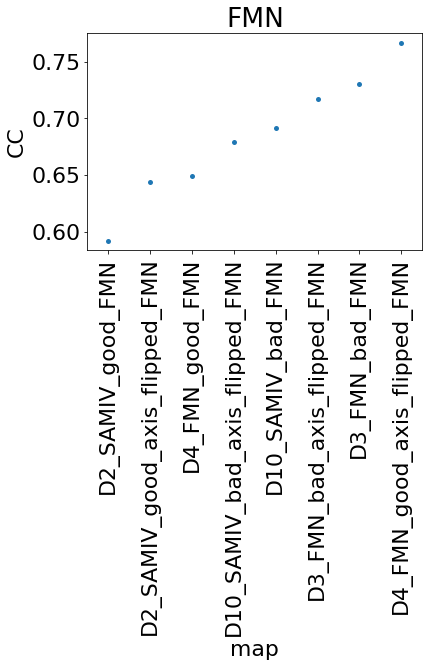

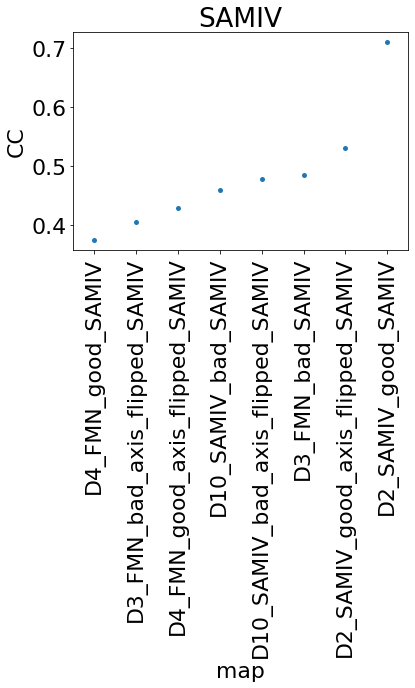

In [182]:
for name, group in all_models_df.groupby('original_map'):
    sorted_df = group.sort_values('CC')
    sns.stripplot(data=sorted_df, x='map', y='CC')
    plt.xticks(rotation=90)
    plt.title(name)
    plt.show();

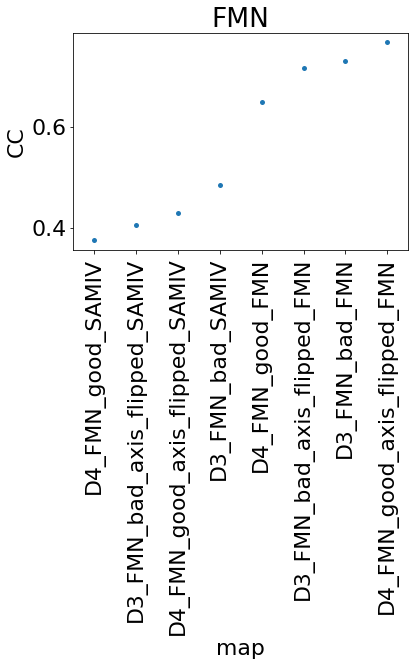

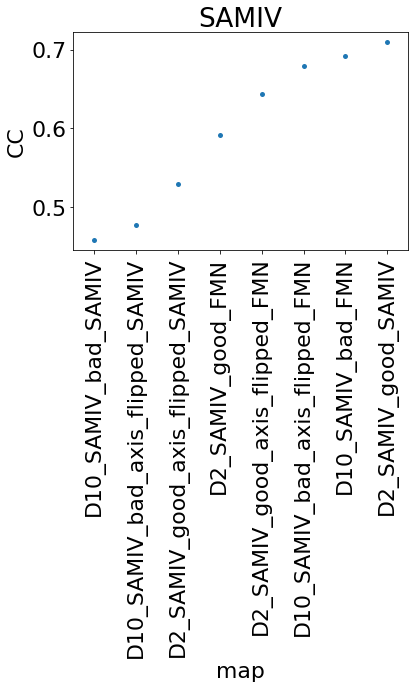

In [183]:
## other things to look at 
## let's group by what I identified them as

for name, group in all_models_df.groupby('identified_as'):
    sorted_df = group.sort_values('CC')
    sns.stripplot(data=sorted_df, x='map', y='CC')
    plt.xticks(rotation=90)
    plt.title(name)
    plt.show();

In [184]:
## interesting that the map I said was "bad" for SAM-IV has a pretty high correlation coefficient with FMN 
## and the "bad" SAMIV has the lowest overall correlation with SAMIV

## leads me to believe that this map doesn't actually represent SAMIV, but rather, is FMN

print(len('final_volume.mrc'))

16


In [185]:
print(len('axis_flipped_final_volume.mrc'))

29
